In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("peppers.png")
imgNoisy = cv2.imread("gaussian_noise_peppers.png")

# filter image using 7x7 Gaussian, the std is calculated automatically
imgGaus = cv2.GaussianBlur(imgNoisy, (7,7), 2)

# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgNoisy = cv2.cvtColor(imgNoisy, cv2.COLOR_BGR2RGB)
imgGaus = cv2.cvtColor(imgGaus, cv2.COLOR_BGR2RGB)

# plot
plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgNoisy)
plt.title("Noisy Original"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imgGaus)
plt.title("7x7 Gaussian"), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'7x7 Gaussian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

20.115998427381882

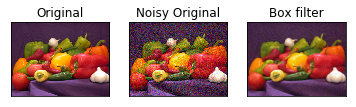

In [35]:
# create a box filter
imgNoisy = cv2.imread("gaussian_noise_peppers.png")

kernel = np.ones((7,7), np.float32)/(7*7)

# filter the image
imgBox = cv2.filter2D(imgNoisy, -1, kernel)
imgBox = cv2.cvtColor(imgBox, cv2.COLOR_BGR2RGB)
imgNoisy = cv2.cvtColor(imgNoisy, cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgNoisy)
plt.title("Noisy Original"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imgGaus)
plt.title("Box filter"), plt.xticks([]), plt.yticks([])

In [33]:
print ("Gaussian Filter image PSNR: " + str(cv2.PSNR(img, imgGaus)))

print ("Box Filter image PSNR: " + str(cv2.PSNR(img, imgBox)))

print("Gaussian Filter has a better PSNR")

Gaussian Filter image PSNR: 29.42329662137037
Box Filter image PSNR: 28.278396476904042
Gaussian Filter has a better PSNR


17.84187436931321

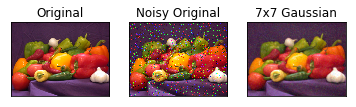

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("peppers.png")
imgNoisy = cv2.imread("saltandpepper_noise_peppers.png")

# filter image using 7x7 Gaussian, the std is calculated automatically
imgGaus = cv2.GaussianBlur(imgNoisy, (7,7), 2)

# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgNoisy = cv2.cvtColor(imgNoisy, cv2.COLOR_BGR2RGB)
imgGaus = cv2.cvtColor(imgGaus, cv2.COLOR_BGR2RGB)

# plot
plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgNoisy)
plt.title("Noisy Original"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imgGaus)
plt.title("7x7 Gaussian"), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Median filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

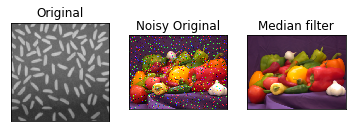

In [9]:
# create a box filter
imgNoisy = cv2.imread("saltandpepper_noise_peppers.png")

imgMed = cv2.medianBlur(imgNoisy, 7)

imgMed = cv2.cvtColor(imgMed, cv2.COLOR_BGR2RGB)
imgNoisy = cv2.cvtColor(imgNoisy, cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgNoisy)
plt.title("Noisy Original"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imgMed)
plt.title("Median filter"), plt.xticks([]), plt.yticks([])

In [41]:
print ("Gaussian Filter image PSNR: " + str(cv2.PSNR(img, imgGaus)))

print ("Median Filter image PSNR: " + str(cv2.PSNR(img, imgMed)))

print("Median Filter has a better PSNR")

Gaussian Filter image PSNR: 28.16493770977665
Median Filter image PSNR: 31.871009920638333
Median Filter has a better PSNR


(Text(0.5,1,'Gaussian (sharpened)'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

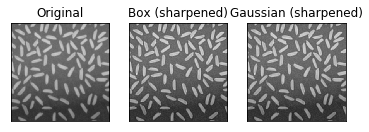

In [3]:
img = cv2.imread("rice.png")

# filter the image Box filter
kernel = np.ones((5,5), np.float32)/(5*5)
imgBox = cv2.filter2D(img, -1, kernel)

boxDetails = img - imgBox
sharpenedBox = img + boxDetails

# filter the image Gaussian filter
imgGaus = cv2.GaussianBlur(img, (5,5), 2)

gausDetails = img - imgGaus
sharpenedGaus = img + gausDetails

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgBox = cv2.cvtColor(imgBox, cv2.COLOR_BGR2RGB)
imgGaus = cv2.cvtColor(imgGaus, cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sharpenedBox)
plt.title("Box (sharpened)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sharpenedGaus)
plt.title("Gaussian (sharpened)"), plt.xticks([]), plt.yticks([])

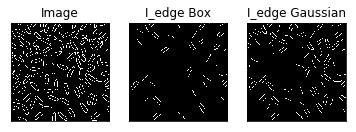

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

riceGray = cv2.imread("rice.png", cv2.IMREAD_GRAYSCALE)
riceBoxGray = cv2.cvtColor(imgBox, cv2.COLOR_RGB2GRAY)
riceGausGray = cv2.cvtColor(imgGaus, cv2.COLOR_RGB2GRAY)

I_edge_rice = cv2.Canny(riceGray, 150, 200)
I_edge_riceBox = cv2.Canny(riceBoxGray, 150, 200)
I_edge_riceGaus = cv2.Canny(riceGausGray, 150, 200)

plt.subplot(131), plt.imshow(I_edge_rice, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_edge_riceBox, cmap="gray")
plt.title("I_edge Box"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_edge_riceGaus, cmap="gray")
plt.title("I_edge Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

puzzle = cv2.imread("where_is_waldo.jpg")
puzzle = cv2.cvtColor(puzzle, cv2.COLOR_BGR2RGB)
# create copy
puzzle_disp = puzzle.copy()

temp = cv2.imread("template1.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

ht, wt = temp.shape[0:2]

# apply template matching
res = cv2.matchTemplate(puzzle, temp, cv2.TM_SQDIFF_NORMED)

np.set_printoptions(precision=3)
print(res)

point = np.where(res == res.min())
y = point[0][0]
x = point[1][0]

cv2.rectangle(puzzle_disp, (x, y), (x+wt, y+ht), (0, 255, 0), 5)

# display images
plt.figure(figsize=(50,50))
plt.imshow(puzzle_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()

[[0.761 0.71  0.717 ... 0.699 0.713 0.723]
 [0.752 0.719 0.721 ... 0.708 0.705 0.711]
 [0.737 0.698 0.697 ... 0.715 0.691 0.699]
 ...
 [0.4   0.403 0.405 ... 0.671 0.672 0.67 ]
 [0.402 0.402 0.405 ... 0.677 0.674 0.668]
 [0.402 0.398 0.399 ... 0.655 0.642 0.634]]


<Figure size 5000x5000 with 1 Axes>

[[0.767 0.714 0.722 ... 0.701 0.714 0.723]
 [0.756 0.721 0.725 ... 0.713 0.708 0.713]
 [0.741 0.702 0.701 ... 0.721 0.696 0.704]
 ...
 [0.415 0.417 0.421 ... 0.669 0.669 0.667]
 [0.418 0.419 0.42  ... 0.675 0.672 0.665]
 [0.418 0.415 0.414 ... 0.654 0.644 0.638]]


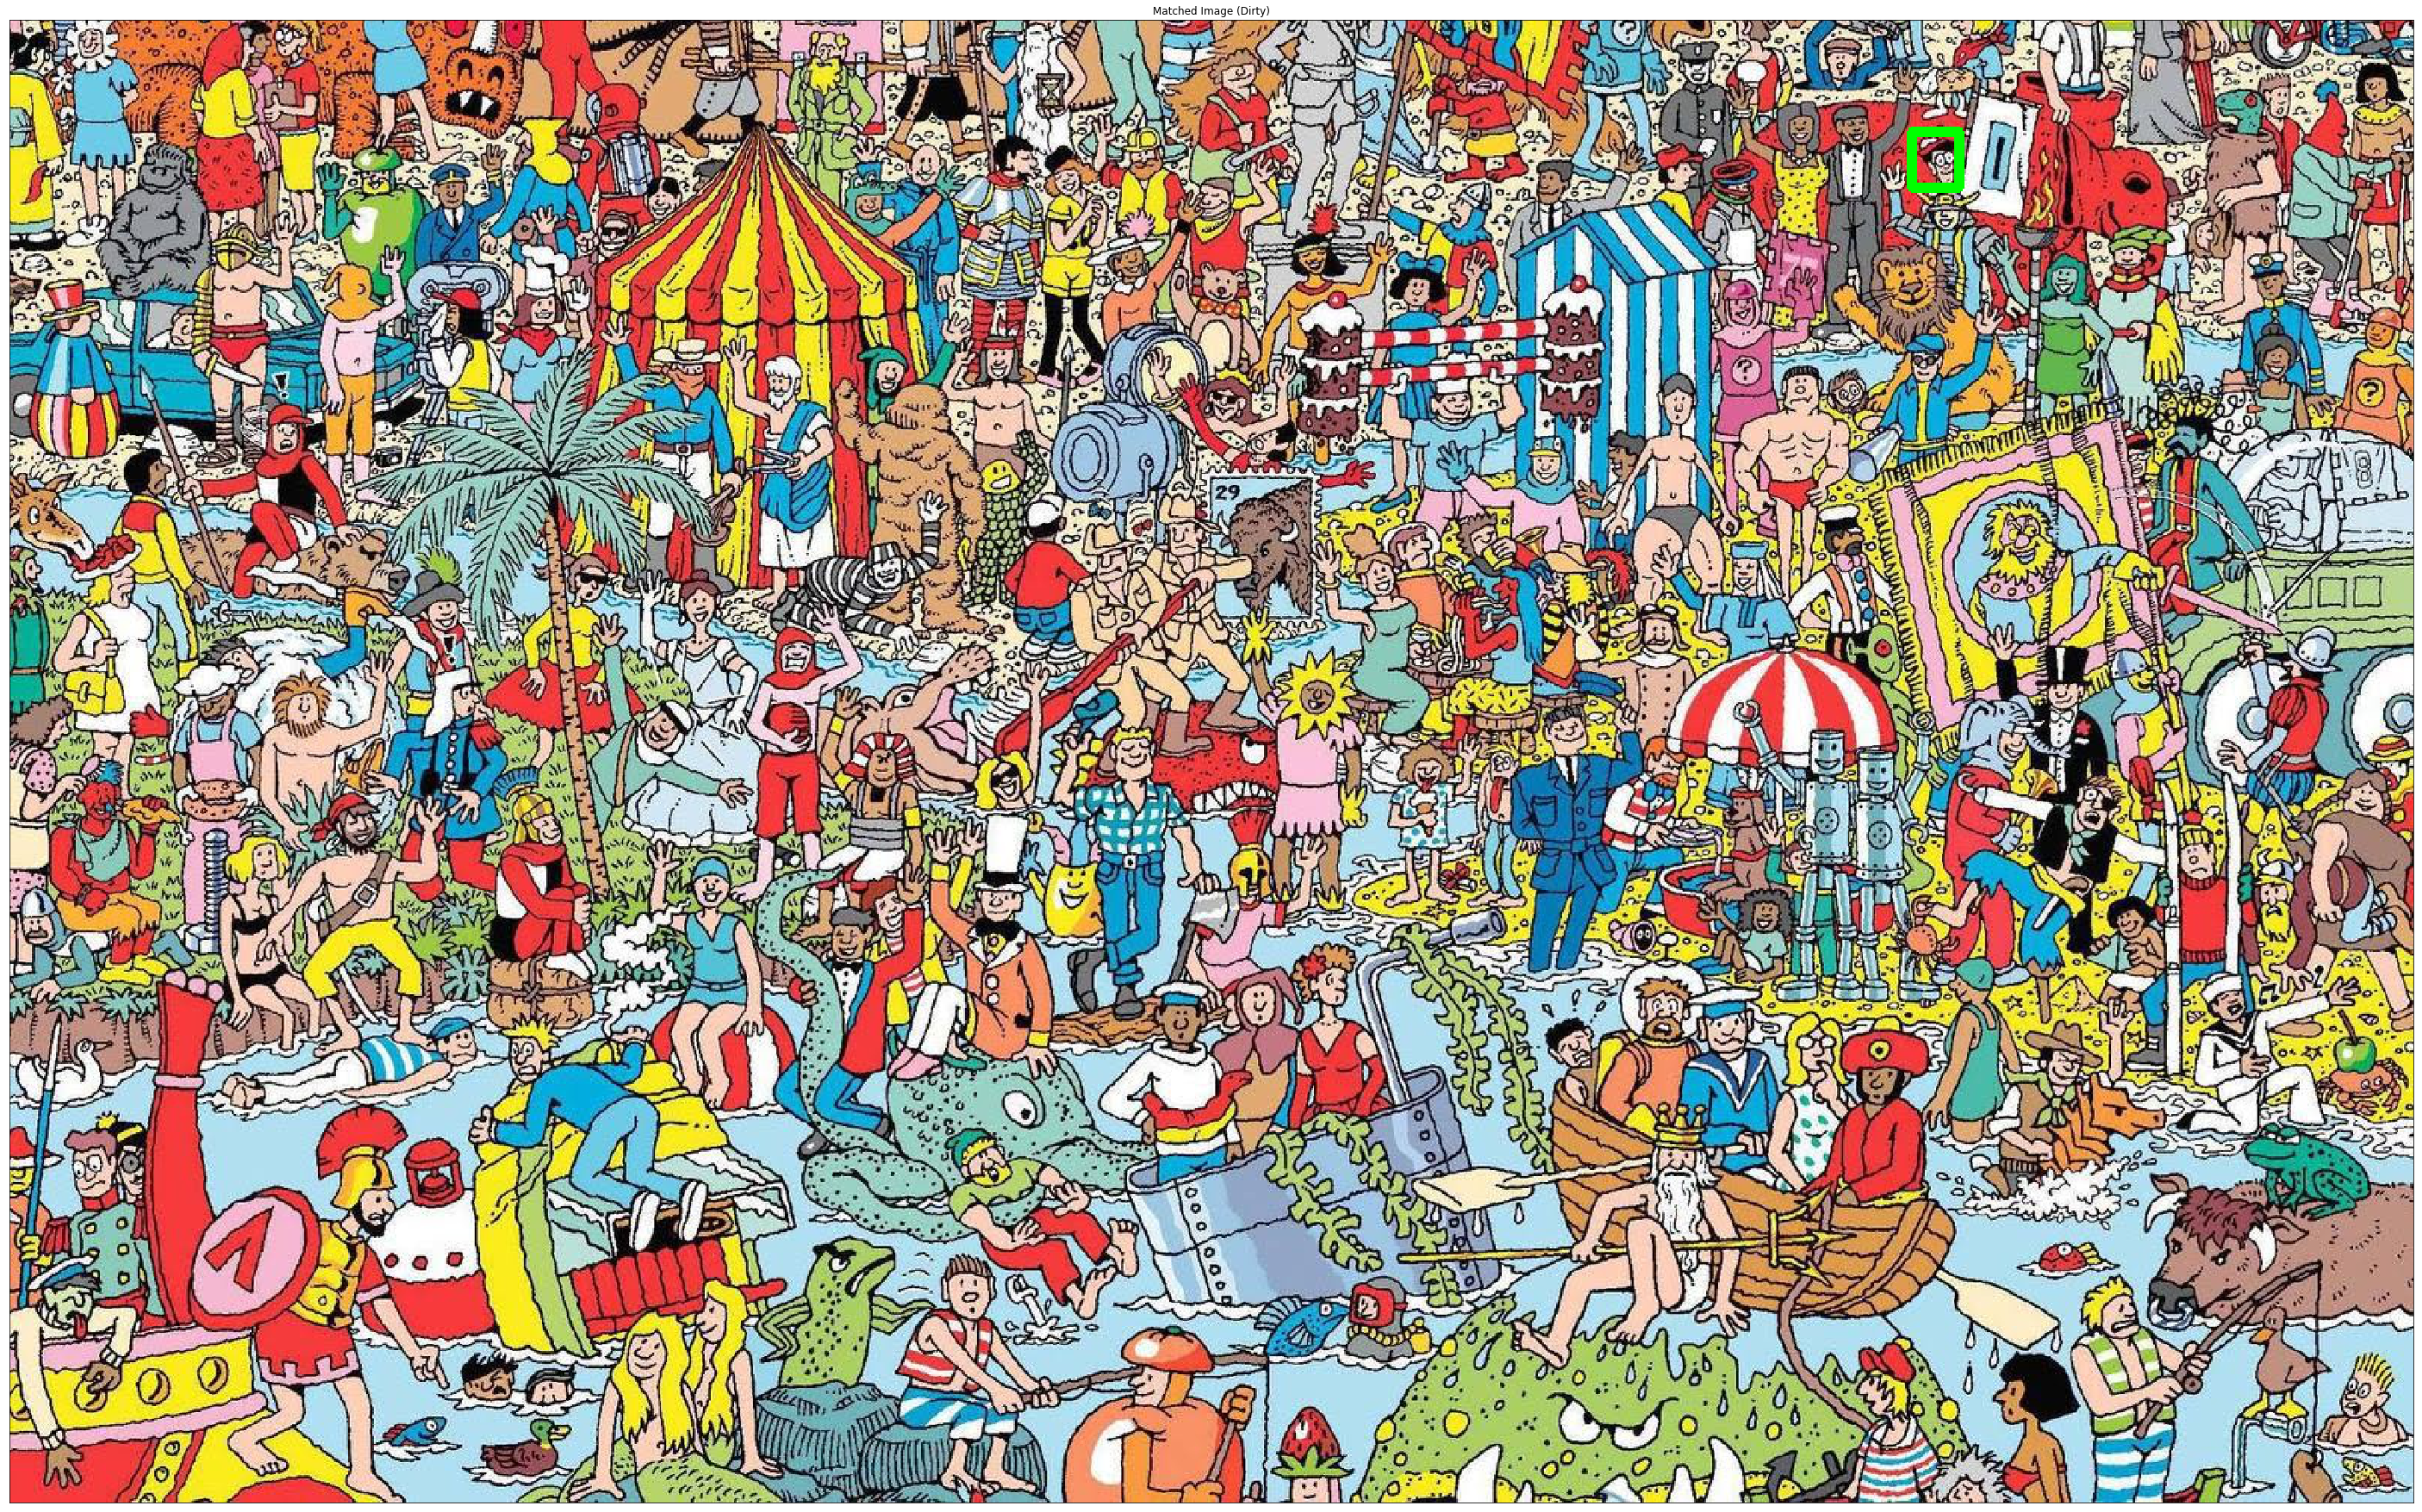

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

puzzle = cv2.imread("where_is_waldo.jpg")
puzzle = cv2.cvtColor(puzzle, cv2.COLOR_BGR2RGB)
# create copy
puzzle_disp = puzzle.copy()

temp = cv2.imread("template2.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

ht, wt = temp.shape[0:2]

# apply template matching
res = cv2.matchTemplate(puzzle, temp, cv2.TM_SQDIFF_NORMED)

print(res)
point = np.where(res == res.min())
y = point[0][0]
x = point[1][0]

cv2.rectangle(puzzle_disp, (x, y), (x+wt, y+ht), (0, 255, 0), 5)

# display images
plt.figure(figsize=(50,50))
plt.imshow(puzzle_disp)
plt.title("Matched Image (Dirty)"), plt.xticks([]), plt.yticks([])
plt.show()